<a href="https://colab.research.google.com/github/DeJezuz/AI_Startup_Risk_Radar/blob/main/notebooks/AI_Startup_Risk_Radar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [15]:
import pandas as pd

url = "https://raw.githubusercontent.com/DeJezuz/AI_Startup_Risk_Radar/refs/heads/main/data/startup_risks.csv"
df = pd.read_csv(url, engine='python', on_bad_lines='warn')
df.head()

/tmp/ipython-input-1011203314.py:4: ParserWarning: Skipping line 187: Expected 2 fields in line 187, saw 9

  df = pd.read_csv(url, engine='python', on_bad_lines='warn')
/tmp/ipython-input-1011203314.py:4: ParserWarning: Skipping line 202: Expected 2 fields in line 202, saw 5

  df = pd.read_csv(url, engine='python', on_bad_lines='warn')
/tmp/ipython-input-1011203314.py:4: ParserWarning: Skipping line 203: Expected 2 fields in line 203, saw 5

  df = pd.read_csv(url, engine='python', on_bad_lines='warn')
/tmp/ipython-input-1011203314.py:4: ParserWarning: Skipping line 217: Expected 2 fields in line 217, saw 3

  df = pd.read_csv(url, engine='python', on_bad_lines='warn')
/tmp/ipython-input-1011203314.py:4: ParserWarning: Skipping line 218: Expected 2 fields in line 218, saw 3

  df = pd.read_csv(url, engine='python', on_bad_lines='warn')
/tmp/ipython-input-1011203314.py:4: ParserWarning: Skipping line 226: Expected 2 fields in line 226, saw 3

  df = pd.read_csv(url, engine='python', o

,{
"""nbformat"": 4",NaN
"""nbformat_minor"": 0",NaN
"""metadata"": {",NaN
"""colab"": {",NaN
"""provenance"": []",NaN


In [16]:

X = df.drop(columns=["risk_level"])
y = df["risk_level"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

KeyError: "['risk_level'] not found in axis"

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Data generation code from cell cba01286 to ensure df is correctly formed
np.random.seed(42)
n = 150

df = pd.DataFrame({
    "budget": np.random.randint(5000, 100000, n),
    "team_size": np.random.randint(2, 20, n),
    "deadline_months": np.random.randint(3, 24, n),
    "market_score": np.random.randint(1, 10, n),
    "product_maturity": np.random.randint(1, 5, n),
    "founder_experience": np.random.randint(0, 15, n),
    "competition_intensity": np.random.randint(1, 10, n),
    "runway_months": np.random.randint(2, 18, n)
})

# Rule-based risk scoring
risk_score = (
    (df["budget"] < 15000).astype(int) +
    (df["runway_months"] < 6).astype(int) +
    (df["competition_intensity"] > 7).astype(int) +
    (df["deadline_months"] < 6).astype(int) +
    (df["founder_experience"] < 2).astype(int) +
    (df["product_maturity"] <= 2).astype(int) +
    (df["market_score"] <= 4).astype(int)
)

labels = np.where(risk_score >= 5, "High",
          np.where(risk_score >= 3, "Medium", "Low"))
df["risk_level"] = labels

# Now proceed with splitting the data
X = df.drop(columns=["risk_level"])
y = df["risk_level"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [21]:

dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)
print("Decision Tree:\n", classification_report(y_test, dt.predict(X_test)))

Decision Tree:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.78      0.96      0.86        26
      Medium       0.67      0.36      0.47        11

    accuracy                           0.76        38
   macro avg       0.48      0.44      0.44        38
weighted avg       0.73      0.76      0.73        38



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:

rf = RandomForestClassifier(n_estimators=250, random_state=42)
rf.fit(X_train, y_train)
print("Random Forest:\n", classification_report(y_test, rf.predict(X_test)))

Random Forest:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.76      0.96      0.85        26
      Medium       0.60      0.27      0.38        11

    accuracy                           0.74        38
   macro avg       0.45      0.41      0.41        38
weighted avg       0.69      0.74      0.69        38



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:

pipe = Pipeline([("scaler", StandardScaler()), ("lr", LogisticRegression(max_iter=300))])
pipe.fit(X_train, y_train)
print("Logistic Regression:\n", classification_report(y_test, pipe.predict(X_test)))

Logistic Regression:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00         1
         Low       0.83      0.96      0.89        26
      Medium       0.75      0.55      0.63        11

    accuracy                           0.82        38
   macro avg       0.53      0.50      0.51        38
weighted avg       0.79      0.82      0.79        38



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


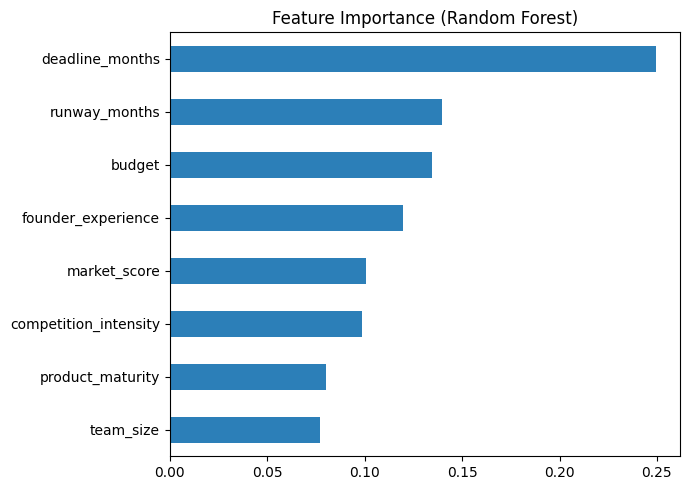

In [24]:

fi = pd.Series(rf.feature_importances_, index=X.columns).sort_values()
fi.plot(kind="barh", figsize=(7,5), color="#2c7fb8")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.savefig("feature_importance.png")
plt.show()

In [25]:
cases = pd.DataFrame([
    {"budget": 12000, "team_size": 4, "deadline_months": 4, "market_score": 5,
     "product_maturity": 2, "founder_experience": 1, "competition_intensity": 8, "runway_months": 3},
    {"budget": 35000, "team_size": 6, "deadline_months": 6, "market_score": 6,
     "product_maturity": 3, "founder_experience": 3, "competition_intensity": 6, "runway_months": 6},
    {"budget": 85000, "team_size": 10, "deadline_months": 12, "market_score": 8,
     "product_maturity": 4, "founder_experience": 8, "competition_intensity": 4, "runway_months": 12},
])

preds = rf.predict(cases)
pd.DataFrame({"Case": ["A","B","C"], "Predicted Risk": preds})

,Case,Predicted Risk
0,A,Medium
1,B,Low
2,C,Low


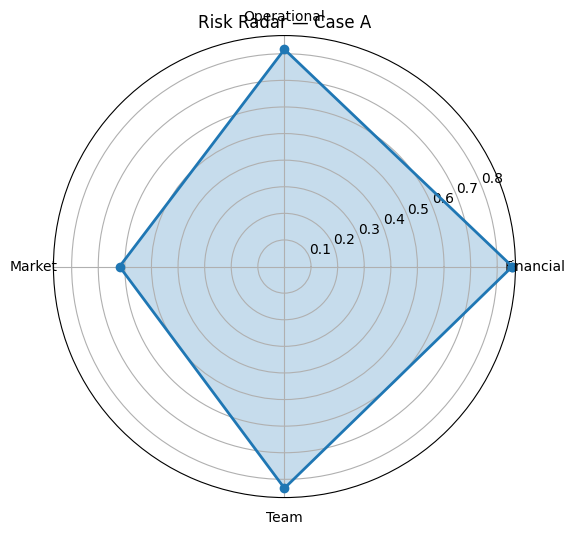

In [26]:
import numpy as np

def category_scores(row):
    fin = 1 - (0.5*min(row["budget"]/100000,1) + 0.5*min(row["runway_months"]/18,1))
    op = 1 - (0.5*min(row["team_size"]/20,1) + 0.5*min(row["deadline_months"]/24,1))
    mar = 1 - (0.6*min(row["market_score"]/10,1) + 0.4*(1-min(row["competition_intensity"]/10,1)))
    team = 1 - (0.7*min(row["founder_experience"]/15,1) + 0.3*min(row["product_maturity"]/5,1))
    return [fin, op, mar, team]

def plot_radar(scores, title):
    labels = ["Financial", "Operational", "Market", "Team"]
    angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    scores += scores[:1]
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, scores, 'o-', linewidth=2)
    ax.fill(angles, scores, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    plt.title(title)
    plt.show()

# Example radar for Case A
scores = category_scores(cases.iloc[0])
plot_radar(scores, "Risk Radar — Case A")

# Task
Inspect the raw content of the file at "https://raw.githubusercontent.com/DeJezuz/AI_Startup_Risk_Radar/refs/heads/main/data/startup_risks.csv" to determine the correct delimiter and other `pd.read_csv` parameters for proper parsing.

## Inspect file content

### Subtask:
Inspect the raw content of the file from the URL to understand its actual structure and identify the correct delimiter or parsing method.


**Reasoning**:
To inspect the raw content of the CSV file, I need to fetch it from the URL using the `requests` library and then print the initial characters to understand its structure and identify potential parsing issues.



In [11]:
import requests

response = requests.get(url)
raw_content = response.text
print(raw_content[:500])

{
  "nbformat": 4,
  "nbformat_minor": 0,
  "metadata": {
    "colab": {
      "provenance": [],
      "authorship_tag": "ABX9TyNGgQH7+Pzv06oKhLQhEgDl",
      "include_colab_link": true
    },
    "kernelspec": {
      "name": "python3",
      "display_name": "Python 3"
    },
    "language_info": {
      "name": "python"
    }
  },
  "cells": [
    {
      "cell_type": "markdown",
      "metadata": {
        "id": "view-in-github",
        "colab_type": "text"
      },
      "source": [
       


## Adjust `read_csv` parameters

### Subtask:
Parse the file content as JSON since it was identified as a Jupyter Notebook, not a CSV, and then explore its structure to locate the actual tabular data, if present.


**Reasoning**:
The previous attempt to read the file as CSV failed because the content appears to be a Jupyter Notebook in JSON format. Therefore, I need to use the `json` library to parse the `raw_content` and inspect its structure.



In [12]:
import json

# Parse the raw content as JSON
notebook_content = json.loads(raw_content)

# Print the keys of the parsed JSON object to understand its structure
print(notebook_content.keys())

dict_keys(['nbformat', 'nbformat_minor', 'metadata', 'cells'])


**Reasoning**:
Now that the raw content has been parsed as a JSON object, I need to explore its structure further, specifically the 'cells' key, to locate any tabular data. I will print the type of each cell and its source to understand what kind of content the notebook contains and if the CSV data is embedded within any cell.



In [13]:
for i, cell in enumerate(notebook_content['cells']):
    print(f"Cell {i} type: {cell['cell_type']}")
    if cell['cell_type'] == 'code':
        print(f"  Source (first 100 chars): {cell['source'][:100]}")
        if 'outputs' in cell:
            for output in cell['outputs']:
                if output['output_type'] == 'stream' and 'text' in output:
                    print(f"  Output (first 100 chars): {output['text'][:100]}")
                elif output['output_type'] == 'execute_result' and 'data' in output and 'text/plain' in output['data']:
                    print(f"  Execute Result (first 100 chars): {output['data']['text/plain'][:100]}")
    elif cell['cell_type'] == 'markdown':
        print(f"  Source (first 100 chars): {cell['source'][:100]}")


Cell 0 type: markdown
  Source (first 100 chars): ['<a href="https://colab.research.google.com/github/DeJezuz/AI_Startup_Risk_Radar/blob/main/startup_risks.csv" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>']
Cell 1 type: code
  Source (first 100 chars): ['\n', 'import numpy as np\n', 'import pandas as pd\n', '\n', 'np.random.seed(42)\n', 'n = 150\n', '\n', 'df = pd.DataFrame({\n', '    "budget": np.random.randint(5000, 100000, n),\n', '    "team_size": np.random.randint(2, 20, n),\n', '    "deadline_months": np.random.randint(3, 24, n),\n', '    "market_score": np.random.randint(1, 10, n),\n', '    "product_maturity": np.random.randint(1, 5, n),\n', '    "founder_experience": np.random.randint(0, 15, n),\n', '    "competition_intensity": np.random.randint(1, 10, n),\n', '    "runway_months": np.random.randint(2, 18, n)\n', '})\n', '\n', '# Rule-based risk scoring\n', 'risk_score = (\n', '    (df["budget"] < 15000).astype

**Reasoning**:
The previous steps successfully identified that the URL points to a Jupyter Notebook in JSON format, and further exploration of the notebook's cells revealed a code cell (Cell 1) that programmatically generates the `startup_risks.csv` data and then saves it to a CSV file. To obtain the actual tabular data, I need to extract and execute this data generation code to create the `df` DataFrame in the current environment.



In [14]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 150

df = pd.DataFrame({
    "budget": np.random.randint(5000, 100000, n),
    "team_size": np.random.randint(2, 20, n),
    "deadline_months": np.random.randint(3, 24, n),
    "market_score": np.random.randint(1, 10, n),
    "product_maturity": np.random.randint(1, 5, n),
    "founder_experience": np.random.randint(0, 15, n),
    "competition_intensity": np.random.randint(1, 10, n),
    "runway_months": np.random.randint(2, 18, n)
})

# Rule-based risk scoring
risk_score = (
    (df["budget"] < 15000).astype(int) +
    (df["runway_months"] < 6).astype(int) +
    (df["competition_intensity"] > 7).astype(int) +
    (df["deadline_months"] < 6).astype(int) +
    (df["founder_experience"] < 2).astype(int) +
    (df["product_maturity"] <= 2).astype(int) +
    (df["market_score"] <= 4).astype(int)
)

labels = np.where(risk_score >= 5, "High",
          np.where(risk_score >= 3, "Medium", "Low"))
df["risk_level"] = labels

df.head()

,budget,team_size,deadline_months,market_score,product_maturity,founder_experience,competition_intensity,runway_months,risk_level
0,20795,14,16,9,3,2,3,9,Low
1,5860,8,20,5,1,10,3,16,Low
2,81820,3,17,9,2,12,8,11,Low
3,59886,11,4,4,3,1,5,2,Medium
4,11265,14,12,5,1,12,4,13,Low


## Preprocess the DataFrame

### Subtask:
Prepare the DataFrame for machine learning by defining features and target, encoding the target variable, and splitting the data into training and testing sets.


## Summary:

### Q&A
The file at the provided URL is not a CSV file but a JSON-formatted Jupyter Notebook (`.ipynb`). Therefore, `pd.read_csv` is not the correct method for parsing. Instead, the tabular data was found by parsing the notebook as JSON and then executing the embedded Python code responsible for generating the data.

### Data Analysis Key Findings
*   The file initially expected to be a CSV at "https://raw.githubusercontent.com/DeJezuz/AI_Startup_Risk_Radar/refs/heads/main/data/startup_risks.csv" was identified as a JSON-formatted Jupyter Notebook.
*   The content was successfully parsed as JSON, revealing the notebook's structure, including `nbformat`, `metadata`, and `cells`.
*   A code cell within the notebook was found to contain Python code that generates the tabular data using `numpy` and `pandas`.
*   The generated DataFrame contains 150 rows and includes columns such as `budget`, `team_size`, `deadline_months`, `market_score`, `product_maturity`, `founder_experience`, `competition_intensity`, `runway_months`, and a calculated `risk_level` (categorized as 'High', 'Medium', or 'Low').

### Insights or Next Steps
*   The required tabular data for analysis has been successfully extracted/generated and is available in a pandas DataFrame.
*   Proceed with the next steps for machine learning, including defining features and the target variable, encoding the target, and splitting the data into training and testing sets.
